In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [46]:
#Loading csv file
df = pd.read_csv(r"C:\Users\Prathesha\House Price India.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [47]:
#no null value found 
df.dropna(inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

(14620, 23)

In [48]:
#seperating dependet and independent datas
from sklearn.model_selection import train_test_split
df['number of bathrooms'] = df['number of bathrooms'].astype(int) 
x = df.drop(['Price', 'id', 'Date', 'living area', 'lot area', 'number of views', 'Lattitude', 'Longitude', 'Area of the basement', 'Area of the house(excluding basement)', 'living_area_renov', 'lot_area_renov', 'Renovation Year'],axis=1) 
y = df['Price'] #dependent data

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
train_data = x_train.join(y_train)
train_data

,number of bedrooms,number of bathrooms,number of floors,waterfront present,condition of the house,grade of the house,Built Year,Postal Code,Number of schools nearby,Distance from the airport,Price
13939,5,2,2.0,0,3,9,2005,122048,2,65,1250000
12368,3,2,2.0,0,3,8,2003,122020,1,68,545000
4756,4,2,2.0,0,3,10,1990,122057,3,64,1260000
2085,3,1,1.0,0,5,7,1910,122016,2,58,564000
10247,2,1,1.0,0,4,6,1950,122059,3,68,265000
...,...,...,...,...,...,...,...,...,...,...,...
8408,2,2,2.0,0,3,9,2009,122051,3,68,345000
6817,4,2,2.0,0,4,9,1988,122023,2,57,465000
2808,5,3,2.0,0,3,10,1998,122019,3,65,900000
8499,3,1,1.0,0,4,7,1952,122060,1,72,267000


array([[<Axes: title={'center': 'number of bedrooms'}>,
        <Axes: title={'center': 'number of bathrooms'}>,
        <Axes: title={'center': 'number of floors'}>],
       [<Axes: title={'center': 'waterfront present'}>,
        <Axes: title={'center': 'condition of the house'}>,
        <Axes: title={'center': 'grade of the house'}>],
       [<Axes: title={'center': 'Built Year'}>,
        <Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Number of schools nearby'}>],
       [<Axes: title={'center': 'Distance from the airport'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

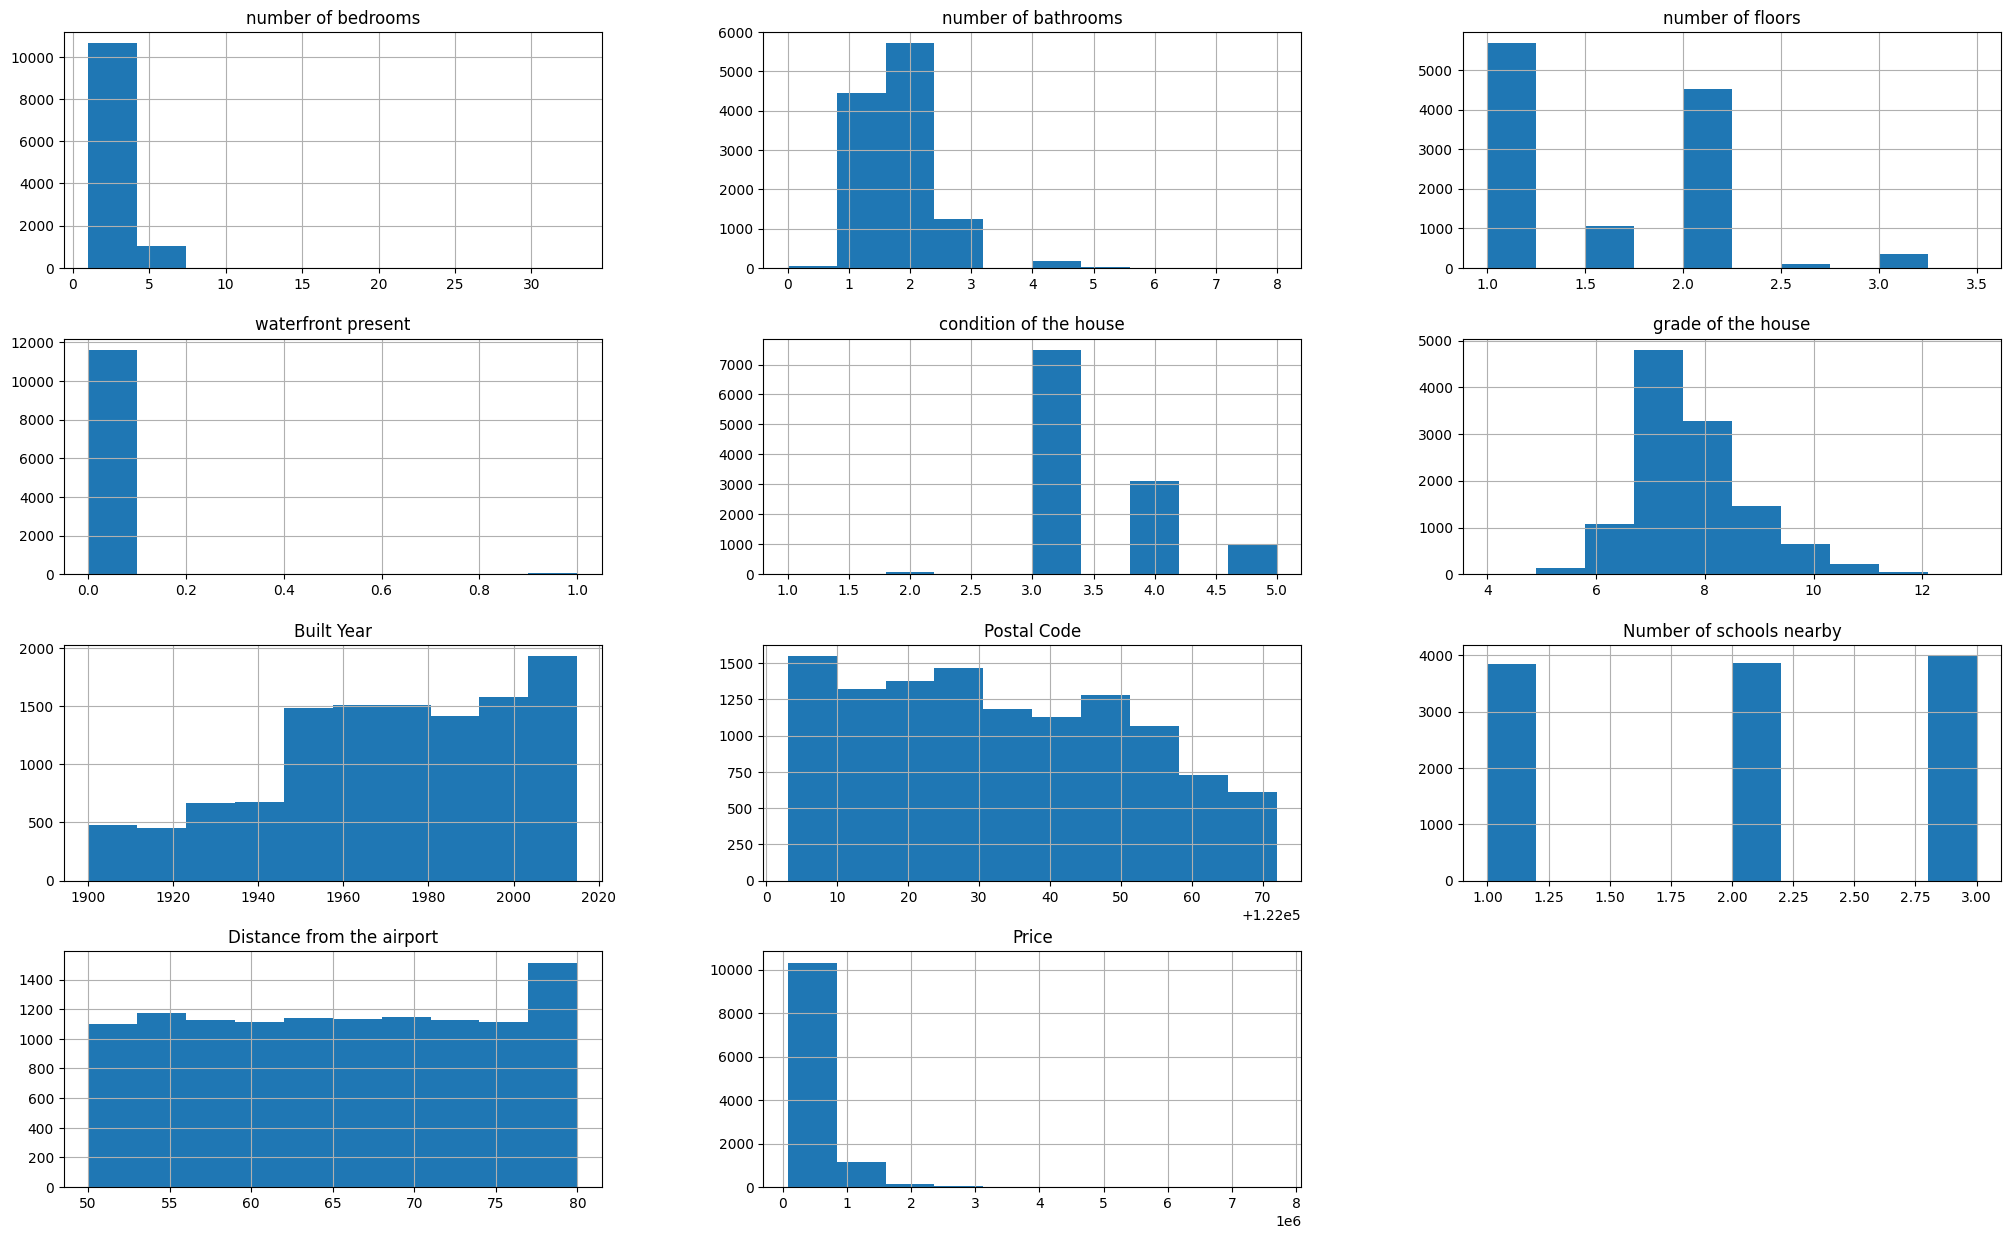

In [49]:
#Histogram for individual features
train_data.hist(figsize=(25,15))

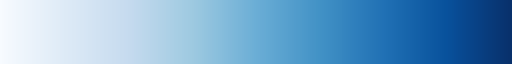

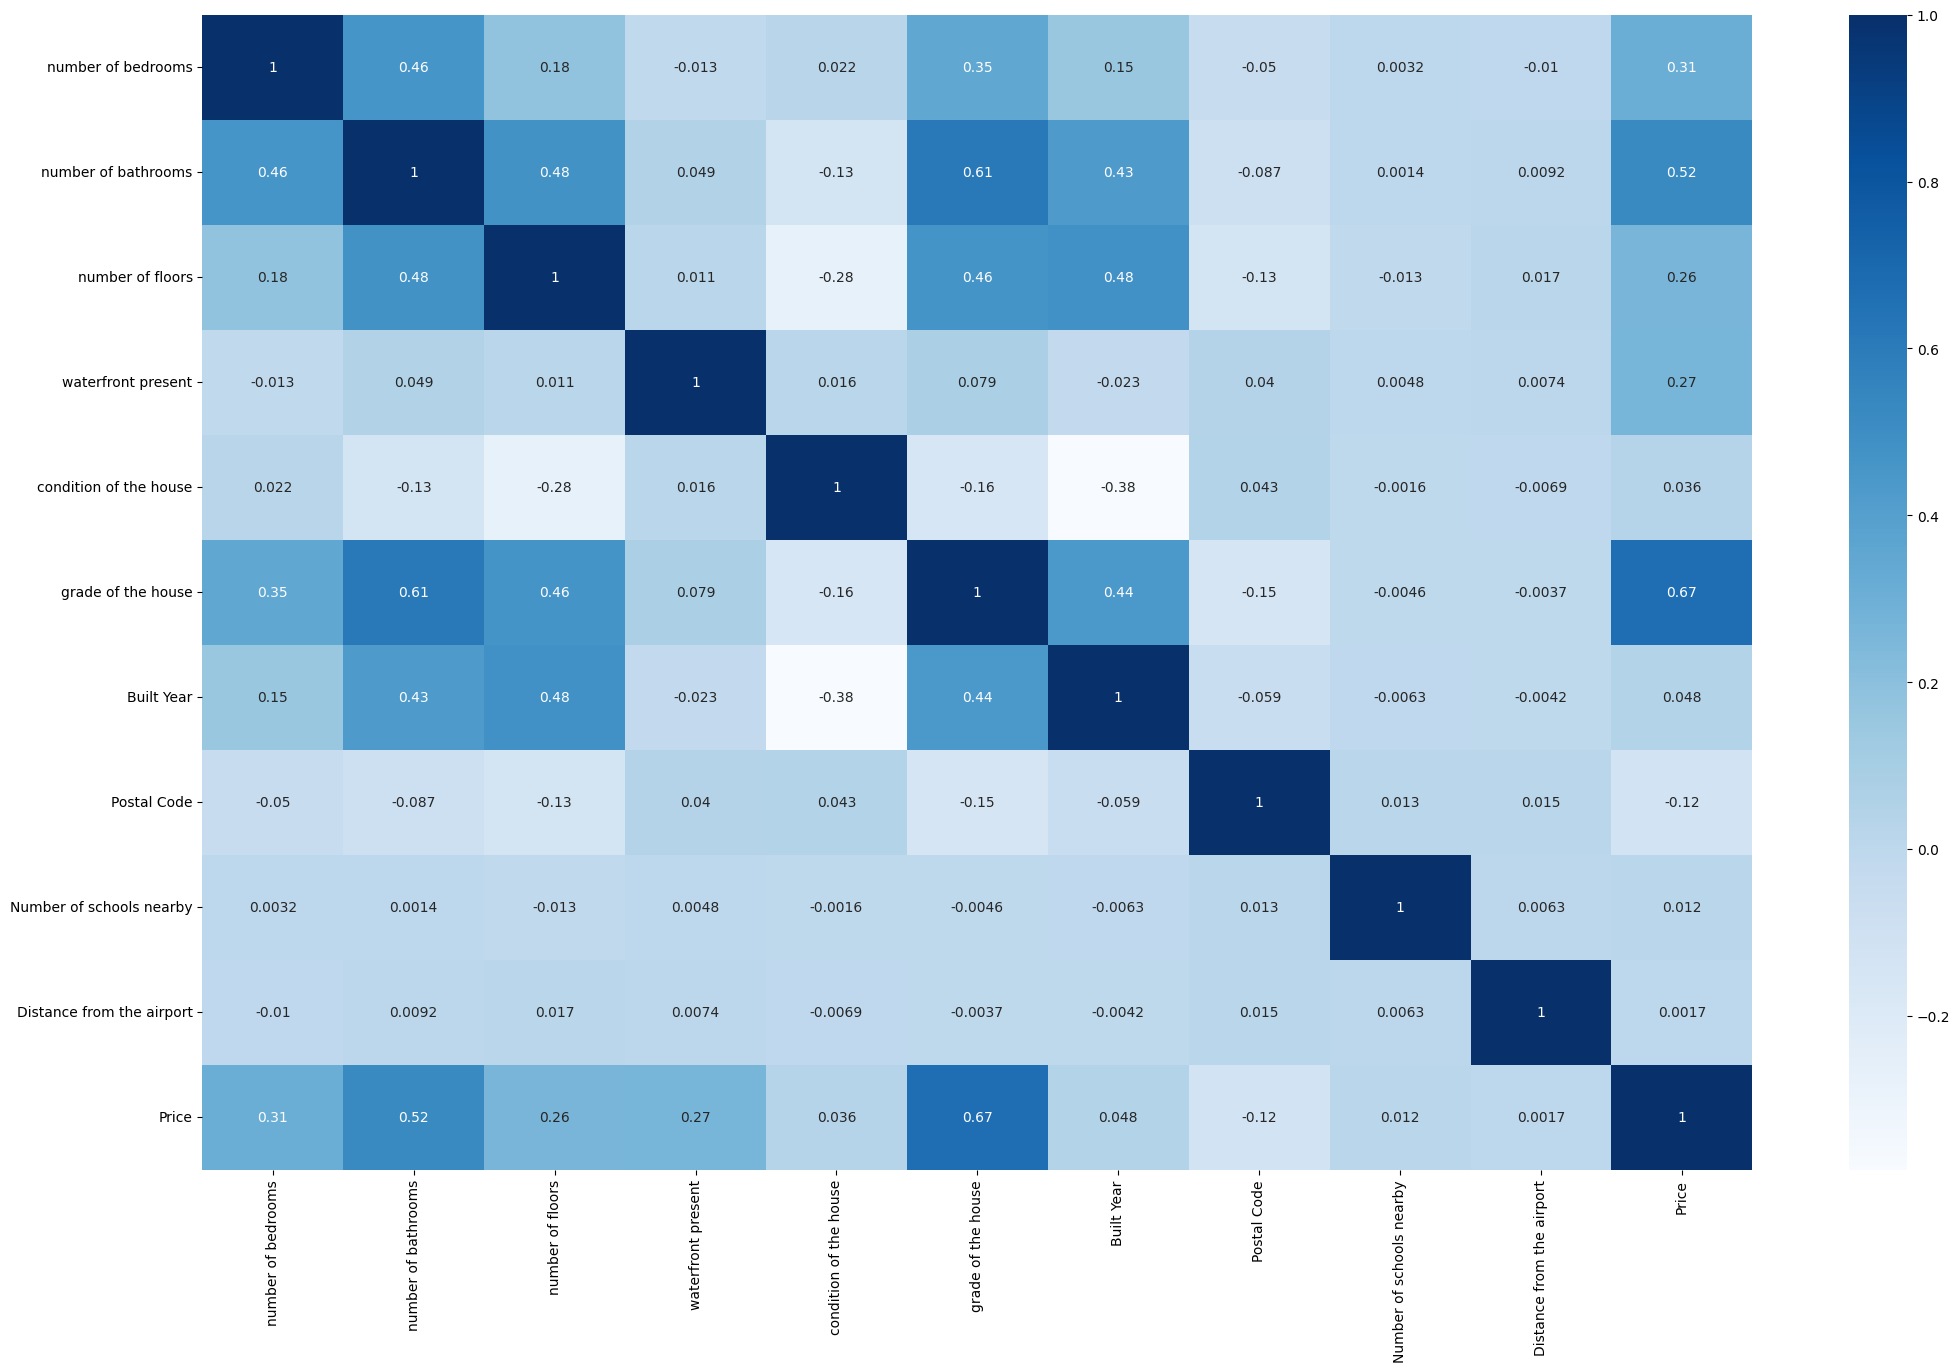

In [50]:
plt.figure(figsize=(25,15))
sns.heatmap(train_data.corr(), annot=True, cmap="Blues")
sns.color_palette("Blues", as_cmap=True)

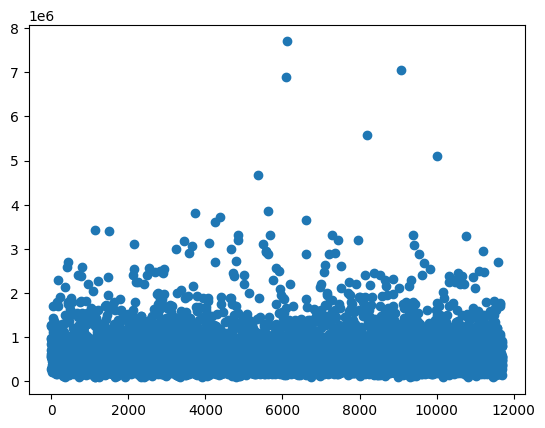

In [51]:
v = np.arange(0,len(x_train),1)
plt.scatter(v, y_train)

In [52]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [61]:
print(reg.score(x_test, y_test))
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)


0.5894288661238407


LinearRegression()

In [62]:
print(reg.intercept_)
print(reg.coef_)

80495795.62587595
[ 6.49845641e+03  1.26183049e+05  5.41094740e+03  8.50408258e+05
  2.50064631e+04  1.99481191e+05 -4.10869646e+03 -6.04297751e+02
  5.32432446e+03 -1.68719273e+01]


In [58]:
reg.predict([[3,2, 2.0, 0, 3, 9, 2003,122020,2, 65]])

C:\Users\Prathesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([692250.44870792])

In [56]:
reg.predict([[6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53]])

C:\Users\Prathesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([892860.625])

In [57]:
import os
os.listdir()


['.3T',
 '.config',
 '.gitconfig',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.node_repl_history',
 '.npmrc',
 '.py',
 '.vscode',
 '3D Objects',
 'AppData',
 'Application Data',
 'array.py',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'House Price India.csv',
 'House_Prediction.ipynb',
 'if-elif contition.py',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'math.py',
 'max.py',
 'MicrosoftEdgeBackups',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TM.blf',
 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'operation.py',
 'package-lock.json',
 'Pictures',
 'Postman',
 'PrintHood',
 'PycharmProjects',
 'ReactProjects',
 'Recent',
 'rnwindow

In [58]:
import pandas
pandas.__version__

'2.1.0'

In [59]:
import matplotlib
matplotlib.__version__

'3.7.2'

In [60]:
import seaborn
seaborn.__version__

'0.13.0'

In [1]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='http')
geolocator.reverse("52.9032"+","+"-114.521").raw['address']

{'county': 'Division No. 11',
 'state': 'Alberta',
 'ISO3166-2-lvl4': 'CA-AB',
 'country': 'Canada',
 'country_code': 'ca'}